# Modeling microbial interactions between guilds of traits

Definitions:

1. __Trait__: ability to acquire an essential resource from the environment
2. __Trait Strategy__: mechanistic manner in which an essential resource is obtained
3. __Guild__: set of taxa which follow the same strategy to fulfill a trait.

Principles:

1. A taxon must fulfill a set of traits to ensure survival
2. A trait may be populated by several guilds
3. A taxon may belong to more than one guild in the same trait
4. Each taxon must belong to at least one guild of each trait to ensure survival

Model:

We depart from a set of traits that each taxon must fulfil, $T_1, T_2, \dots, T_k$.

A trait is populated by one or more guilds, i.e., $T_i = \{g_1, \dots, g_n\}$.

Each guild is populated by one or more taxa, i.e, $g_i = \{s_1, \dots, s_m\}$.

We define a multipartite, undirected graph $G(v, e)$ with $n+1$ (disconnected) sets of vertices, one corresponding to the set of taxa and the rest corresponding to each trait. Due to the established principles, the graph has the following properties:

1. An edge connects one taxon to a guild if this taxon belongs to  the guild
2. Each taxon is connected to at lest one guild in each trait (color), so the degree of each $s-vertex$ is $\ge k$.

Let's look at an example, in which 3 taxa, 7 guilds and 3 traits are represented:

<img src="Graph.png" alt="Example graph" style="width:60%; display:block; margin:auto">

In the graph above, we see, for example, that taxa $s_1, s_3$ belong to guilds $g_1$, $g_4$ and $g_7$ which fulfill all 3 traits. However, taxon $s_1$ also belongs to guild $g_3$ which fulfills trait $T_2$ along with guild $g_4$. Moreover, we can visually identify two clusters, or communities, in the graph. One cluster formed by taxa $s_1$ and $s_3$, and another by taxon $s_2$. These clusters are defined based on the local density of connections to guilds. A number of algorithms exist to extract vertex communities from graphs. In the following, we apply the Leiden algorithm to automatically  detect the two communities or clusters that we visually identified before, which comes handy when we are dealing with larger graphs!

__NOTES__:

1. The current principles are not sufficient to explain structural (ecology) dynamics. We should also consider relations between taxa, since some resources are produced by members of the community.
2. Perhaps we can predict resource production/excretion using the same principles that we use to predict membership to a guild, i.e., genomics.

In [1]:
import numpy as np
import igraph as ig
import leidenalg

nodes = ['s1', 's2', 's3', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7']
colors = [['s1', 's2', 's3'], ['g1', 'g2'], ['g3', 'g4', 'g5'], ['g6', 'g7']]

# Graph adjacency matrix
A = np.array(
[
    [0,0,0,1,0,1,1,0,0,1],
    [0,0,0,0,1,1,0,1,1,0],
    [0,0,0,1,0,0,1,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0]
])

# Partitioning vertices with the Leiden algorithm

We want to find communities of vertices that cluster within the graph. Additionally, our graph is bipartite, and we are only interested in finding communities of vertices corresponding to taxa. We will employ the Leiden algorithm to find such communities.

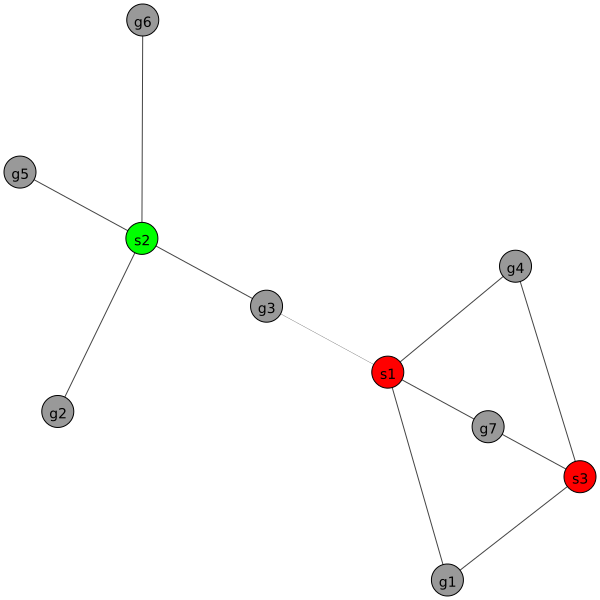

In [2]:
G = ig.Graph.Adjacency(A, mode='undirected')
partition = leidenalg.find_partition(G, leidenalg.ModularityVertexPartition)

# Color only S vertices
n_clusters = max(partition.membership) + 1
pal = ig.drawing.colors.ClusterColoringPalette(n_clusters)

colors = [(0.6,0.6,0.6,1.0) for _ in range(len(G.vs))]
for i, m in enumerate(partition.membership[:3]):
    colors[i] = pal.get(m)

edge_widths = [1 for _ in range(len(G.es))]
for i, edge in enumerate(G.es):
    clust_s = partition.membership[edge.source]
    clust_t = partition.membership[edge.target]
    if clust_s != clust_t:
        edge_widths[i] = 0.3 * edge_widths[i]

# Plot graph
styles = {
    'vertex_color': colors,
    'vertex_size': 32,
    'edge_width': edge_widths
    
}

ig.plot(G, vertex_label=nodes, target='iGraph.png', **styles)

<img src="iGraph.png" alt="Example graph" style="width:60%; display:block; margin:auto">

As we  see above, the Leiden algorithm detects the same two clusters that were identifed earlier: taxa $s_1, s_3$ and taxon $s_2$.